# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | omboue
Processing Record 4 of Set 1 | mehamn
Processing Record 5 of Set 1 | trelew
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 1 | lugazi
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | beloha
Processing Record 12 of Set 1 | ballarat
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | tautira
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | san rafael
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | campo bom
Processing Record 21 of Set 1 | kavie

Processing Record 39 of Set 4 | avera
Processing Record 40 of Set 4 | olga
Processing Record 41 of Set 4 | yuksekova
Processing Record 42 of Set 4 | cairns
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | kaseda
Processing Record 45 of Set 4 | alta floresta
Processing Record 46 of Set 4 | ostrovnoy
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | kisangani
Processing Record 49 of Set 4 | fallon
Processing Record 0 of Set 5 | nemuro
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | lufilufi
Processing Record 3 of Set 5 | ilebo
Processing Record 4 of Set 5 | pasighat
Processing Record 5 of Set 5 | amderma
City not found. Skipping...
Processing Record 6 of Set 5 | zaysan
Processing Record 7 of Set 5 | inhambane
Processing Record 8 of Set 5 | owando
Processing Record 9 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 5 | ahipara
Processing Record 11 of Set 

Processing Record 27 of Set 8 | uyuni
Processing Record 28 of Set 8 | andenes
Processing Record 29 of Set 8 | gushikawa
Processing Record 30 of Set 8 | mikkeli
Processing Record 31 of Set 8 | port shepstone
Processing Record 32 of Set 8 | abancay
Processing Record 33 of Set 8 | yar-sale
Processing Record 34 of Set 8 | sisimiut
Processing Record 35 of Set 8 | kulhudhuffushi
Processing Record 36 of Set 8 | barao de melgaco
Processing Record 37 of Set 8 | bara
Processing Record 38 of Set 8 | nola
Processing Record 39 of Set 8 | maragogi
Processing Record 40 of Set 8 | houma
Processing Record 41 of Set 8 | kaspiysk
Processing Record 42 of Set 8 | cockburn town
Processing Record 43 of Set 8 | tecpatan
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | mangrol
Processing Record 46 of Set 8 | deputatskiy
Processing Record 47 of Set 8 | klaksvik
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | vila velha
Processing Record 0 of Set 9 | gigmoto
Processi

Processing Record 15 of Set 12 | magistralnyy
Processing Record 16 of Set 12 | rodrigues alves
Processing Record 17 of Set 12 | burgeo
Processing Record 18 of Set 12 | mountain home
Processing Record 19 of Set 12 | sretensk
Processing Record 20 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 21 of Set 12 | talcahuano
Processing Record 22 of Set 12 | makaryev
Processing Record 23 of Set 12 | wote
Processing Record 24 of Set 12 | linjiang
Processing Record 25 of Set 12 | linfen
Processing Record 26 of Set 12 | ozgon
City not found. Skipping...
Processing Record 27 of Set 12 | labuhan
Processing Record 28 of Set 12 | mocuba
Processing Record 29 of Set 12 | panguipulli
Processing Record 30 of Set 12 | tarata
Processing Record 31 of Set 12 | mindelo
Processing Record 32 of Set 12 | murgab
Processing Record 33 of Set 12 | hit
Processing Record 34 of Set 12 | kangaatsiaq
Processing Record 35 of Set 12 | palmares do sul
Processing Record 36 of Set 12 | nalut
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,18.92,85,95,1.14,TL,1674378961
1,bluff,-46.6000,168.3333,12.62,66,73,4.53,NZ,1674378962
2,omboue,-1.5746,9.2618,28.27,72,97,1.84,GA,1674378963
3,mehamn,71.0357,27.8492,3.97,75,40,12.86,NO,1674378963
4,trelew,-43.2490,-65.3051,21.02,43,30,7.38,AR,1674378964


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

1674379306


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

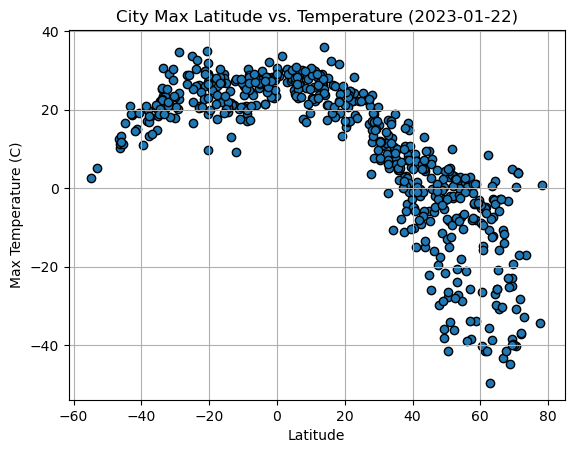

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

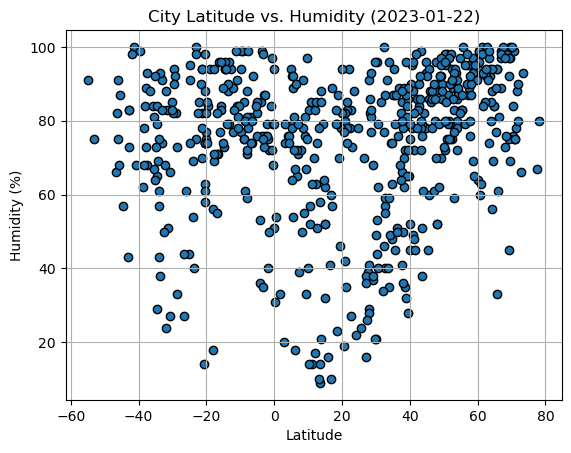

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

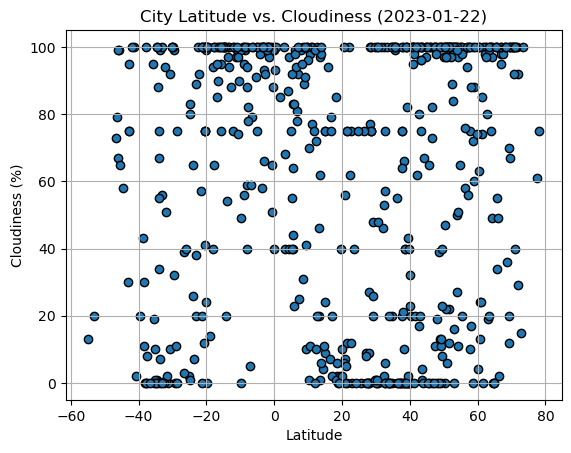

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

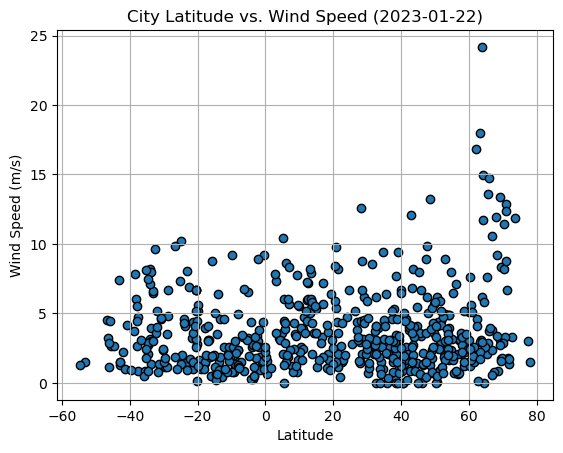

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regression_values, "r-")
    
    
    print(f"The r-value is : {rvalue ** 2}")
    return line_eq


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mehamn,71.0357,27.8492,3.97,75,40,12.86,NO,1674378963
5,lugazi,0.3772,32.9197,29.87,31,93,1.60,UG,1674378965
7,albany,42.6001,-73.9662,-0.77,84,17,0.89,US,1674378627
10,sao filipe,14.8961,-24.4956,21.19,62,24,5.29,CV,1674378806
18,victoria,22.2855,114.1577,22.24,78,62,2.68,HK,1674378168


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,18.92,85,95,1.14,TL,1674378961
1,bluff,-46.6000,168.3333,12.62,66,73,4.53,NZ,1674378962
2,omboue,-1.5746,9.2618,28.27,72,97,1.84,GA,1674378963
4,trelew,-43.2490,-65.3051,21.02,43,30,7.38,AR,1674378964
6,port alfred,-33.5906,26.8910,23.43,92,99,1.34,ZA,1674378966
...,...,...,...,...,...,...,...,...,...
553,mayumba,-3.4320,10.6554,27.25,75,100,0.49,GA,1674379040
554,namwala,-15.7504,26.4384,19.25,96,100,1.93,ZM,1674379290
561,kambove,-10.8764,26.5969,17.75,91,100,2.01,CD,1674379295


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7044504630233213


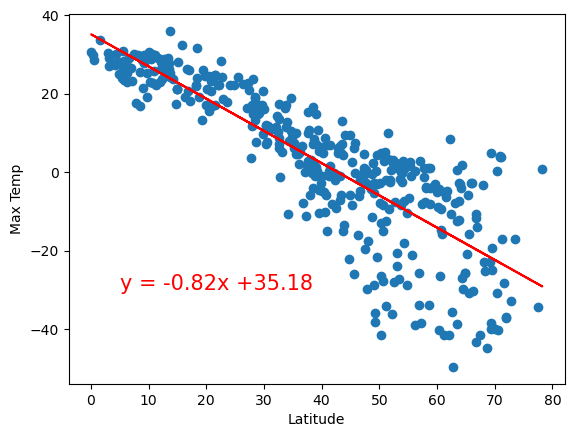

In [15]:
# Linear regression on Northern Hemisphere
regress_temp_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_temp_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(regress_temp_northern_hemi, (5, -30), fontsize=15, color="red")
plt.show()

The r-value is : 0.27048979529718725


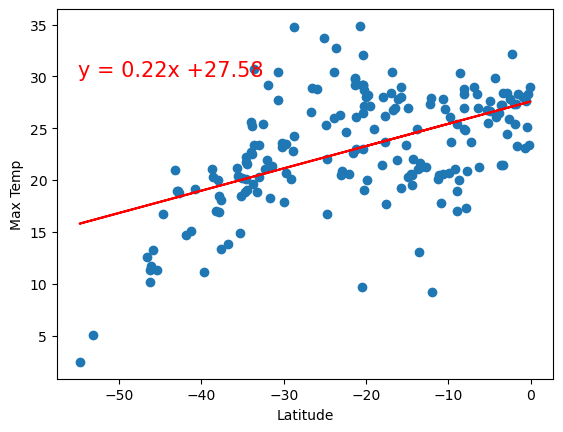

In [16]:
# Linear regression on Southern Hemisphere
regress_temp_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_temp_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(regress_temp_southern_hemi, (-55, 30), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: Since the r-value is approximately 0.70 and the slope of the regression line is negative, the cities' latitudes and max temperatures are highly, negatively correlated for the northern hemisphere.

Southern Hemisphere: Since the r-value is approximately 0.27 and the slope of the regression line is postive, the cities's latitudes and max temperatures are slightly, positively correlated for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.19137499152346737


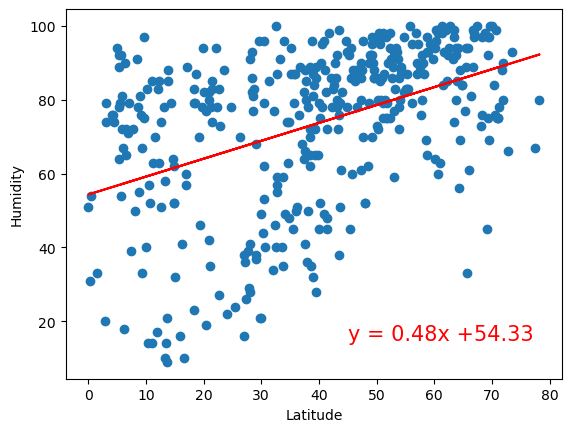

In [17]:
# Northern Hemisphere
regression_humidity_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regression_humidity_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(regression_humidity_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.01028210352212577


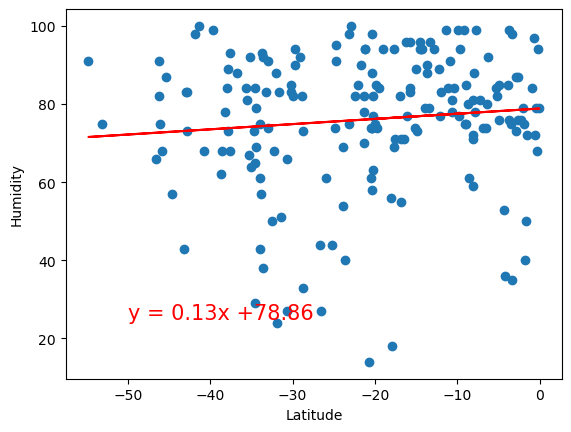

In [18]:
# Southern Hemisphere
regression_humidity_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regression_humidity_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(regression_humidity_southern_hemi, (-50, 25), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: Since the r-value is approximately 0.19 and the slope of the regression line is positive, the cities' latitudes and humdities are slightly, positively correlated for the northern hemisphere.

Southern Hemisphere: Since the r-value is approximately 0.01 and the slope of the regression line is positive, the cities's latitudes and humidities are barely, positively correlated for the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.02522982783945387


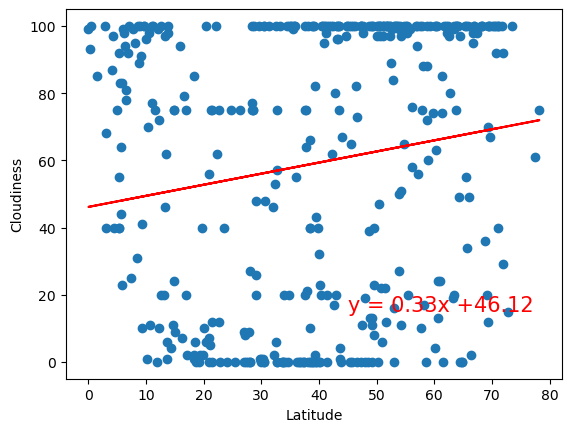

In [19]:
# Northern Hemisphere
regression_cloud_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regression_cloud_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(regression_cloud_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.18906827943592935


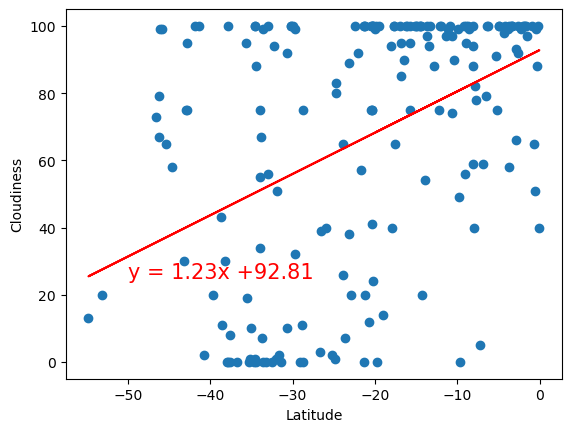

In [20]:
# Southern Hemisphere
regression_cloud_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regression_cloud_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(regression_cloud_southern_hemi, (-50, 25), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere: Since the r-value is approximately 0.025 and the slope of the regression line is positive, the cities' latitudes and cloudiness are barely, positively correlated for the northern hemisphere.

Southern Hemisphere: Since the r-value is approximately 0.19 and the slope of the regression line is positive, the cities's latitudes and cloudiness are  slightly, positively correlated for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.008831342891650303


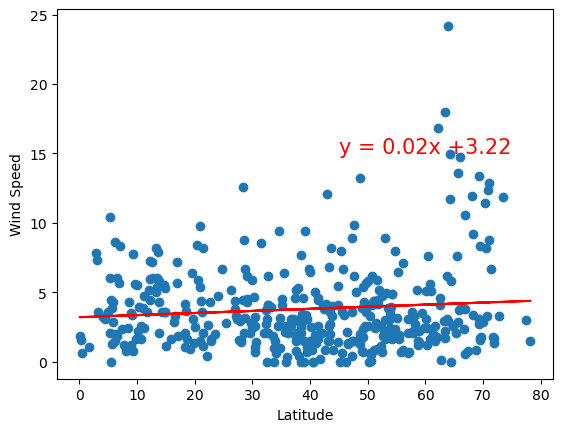

In [21]:
# Northern Hemisphere
regression_wind_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regression_wind_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(regression_wind_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.02159160600836117


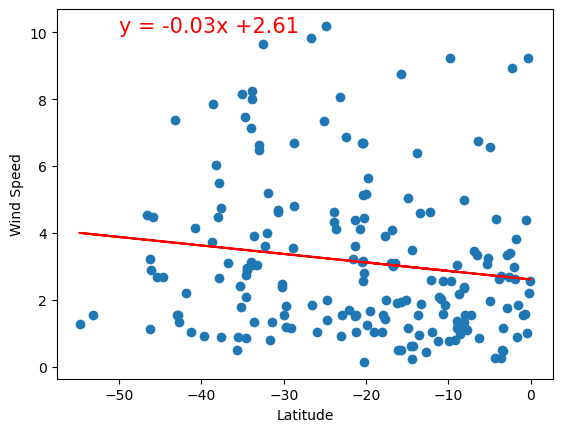

In [22]:
# Southern Hemisphere
regression_wind_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regression_wind_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(regression_wind_southern_hemi, (-50, 10), fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: Since the r-value is approximately 0.0088 and the slope of the regression line is positive, the cities' latitudes and wind speeds are barely, positively correlated for the northern hemisphere.

Southern Hemisphere: Since the r-value is approximately 0.022 and the slope of the regression line is negative, the cities's latitudes and wind speeds are barely, negatively correlated for the southern hemisphere.